In [12]:
from src.circuit_builder import build_stim_circuit, build_qiskit_circuit
from src.data_management import deformation_from_name
from qecsim.models.rotatedplanar import RotatedPlanarCode
import jax.numpy as jnp
import jax.random as random

key = random.key(42)

In [13]:
width, height, rounds = 3, 3, 3

code = RotatedPlanarCode(width, height)
subkey, key = random.split(key)
# deformation = random.choice(subkey, jnp.array([0, 1, 2, 3, 4, 5]), shape=(code.n_k_d[0],), replace=True)
deformation = deformation_from_name(code, "C1")
print("Deformation:")
for row in deformation.reshape(code.size).T:
    print(' '.join([str(bit) for bit in row]))

Deformation:
2 3 2
0 2 0
2 3 2


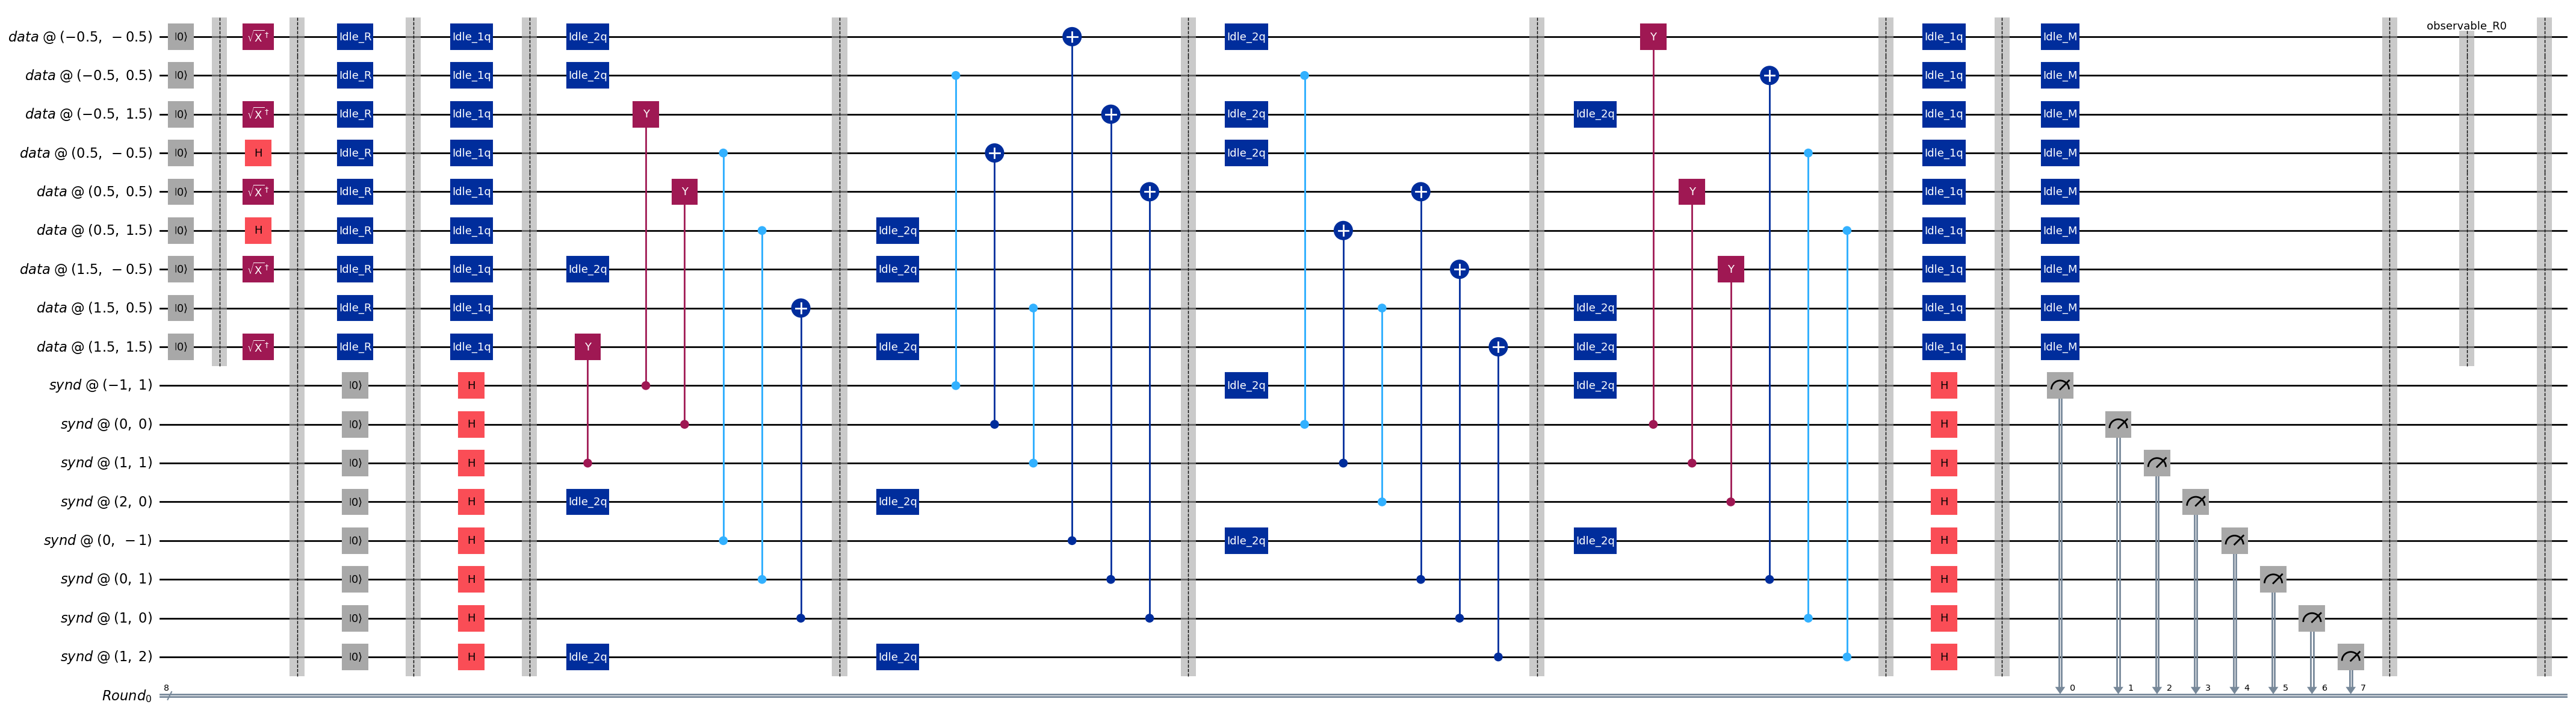

In [14]:
build_qiskit_circuit(code, deformation, rounds=1, basis='+Z').draw('mpl', fold=-1)

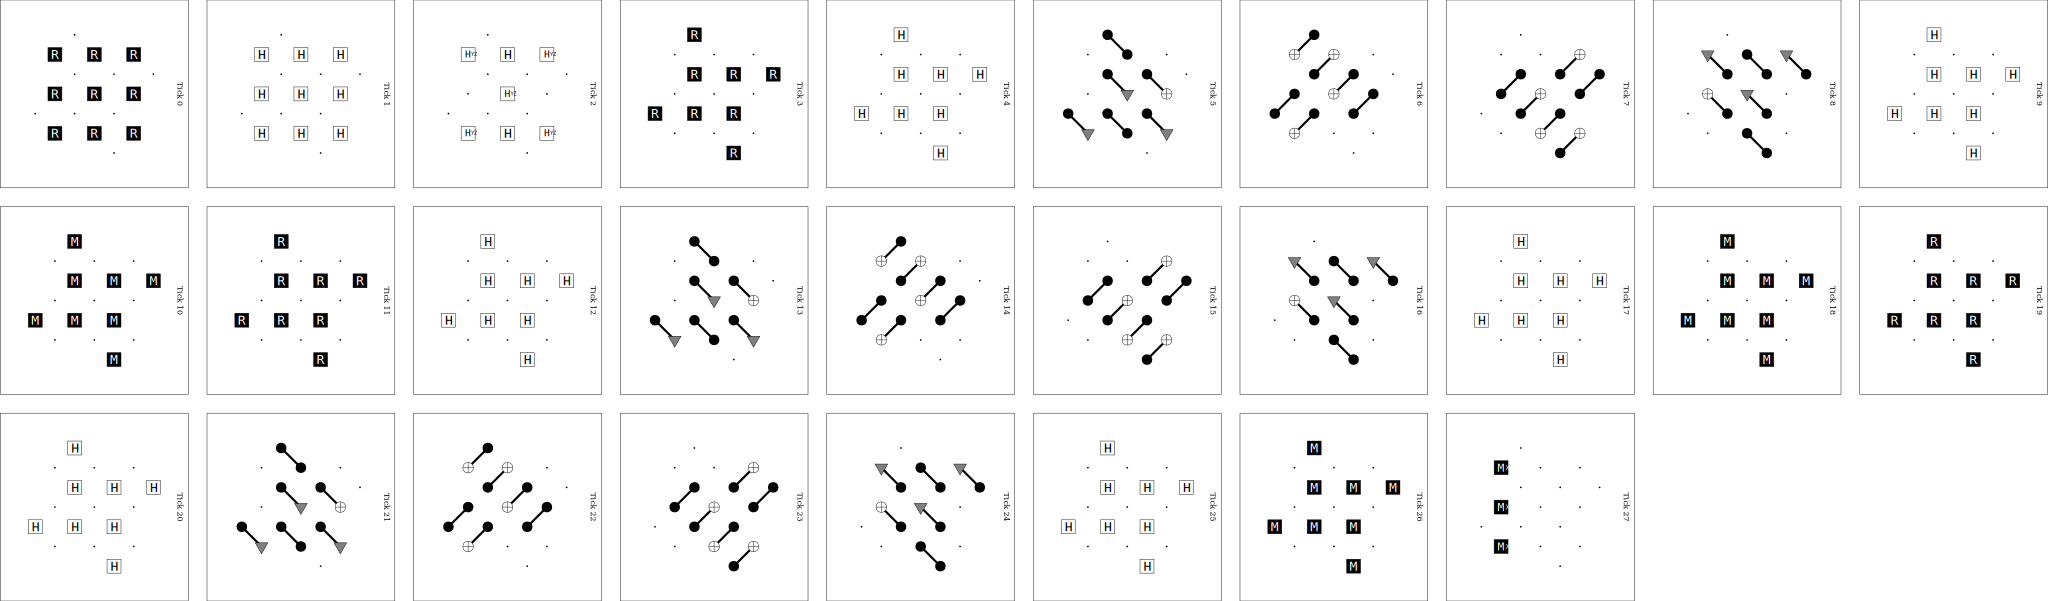

In [18]:
build_stim_circuit(code, deformation, rounds, basis='+X').diagram("timeslice-svg", rows=rounds)

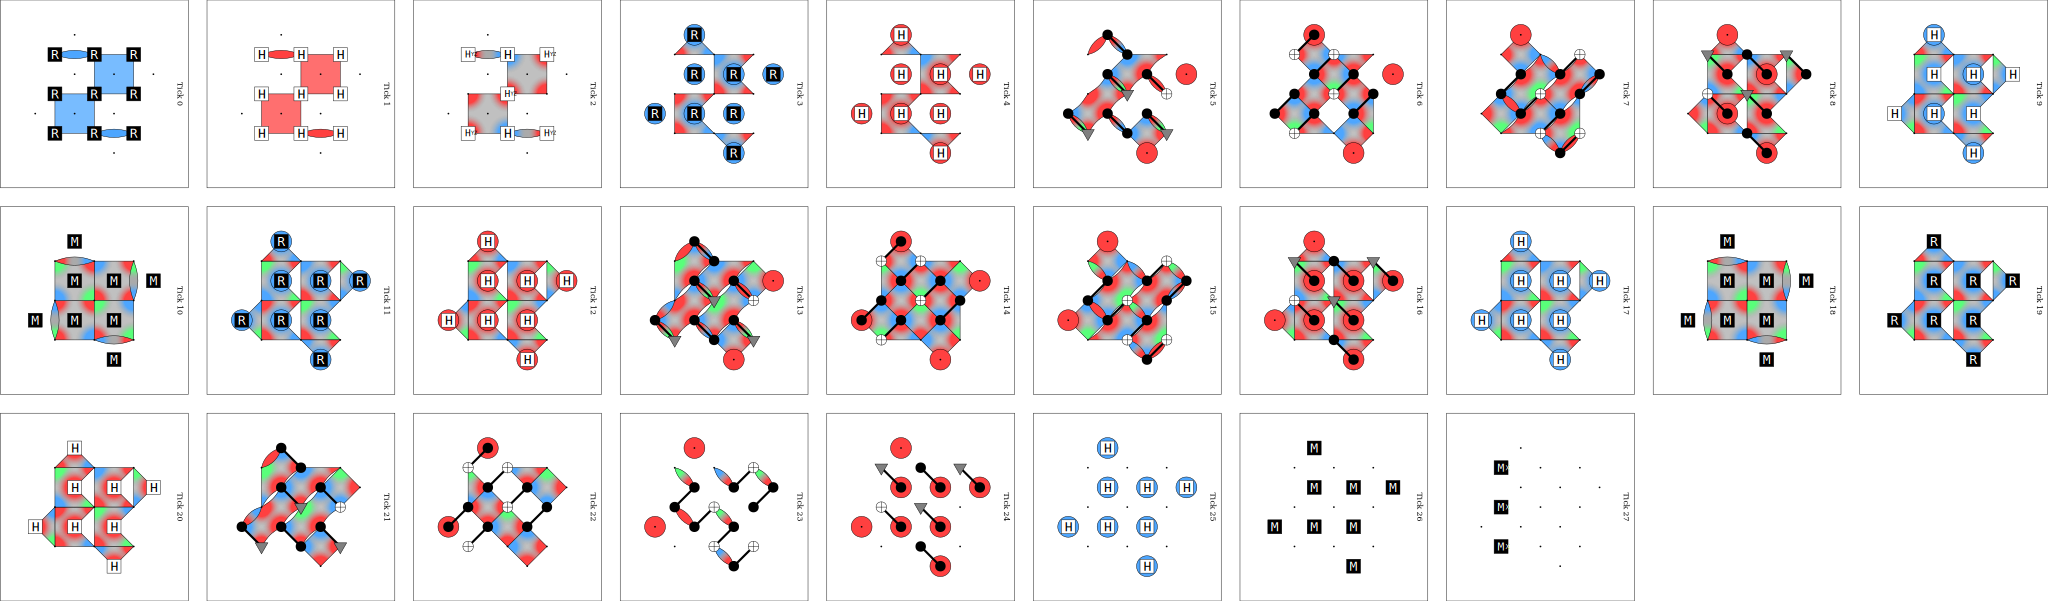

In [15]:
build_stim_circuit(code, deformation, rounds, basis='+X').diagram("detslice-with-ops-svg", rows=rounds)

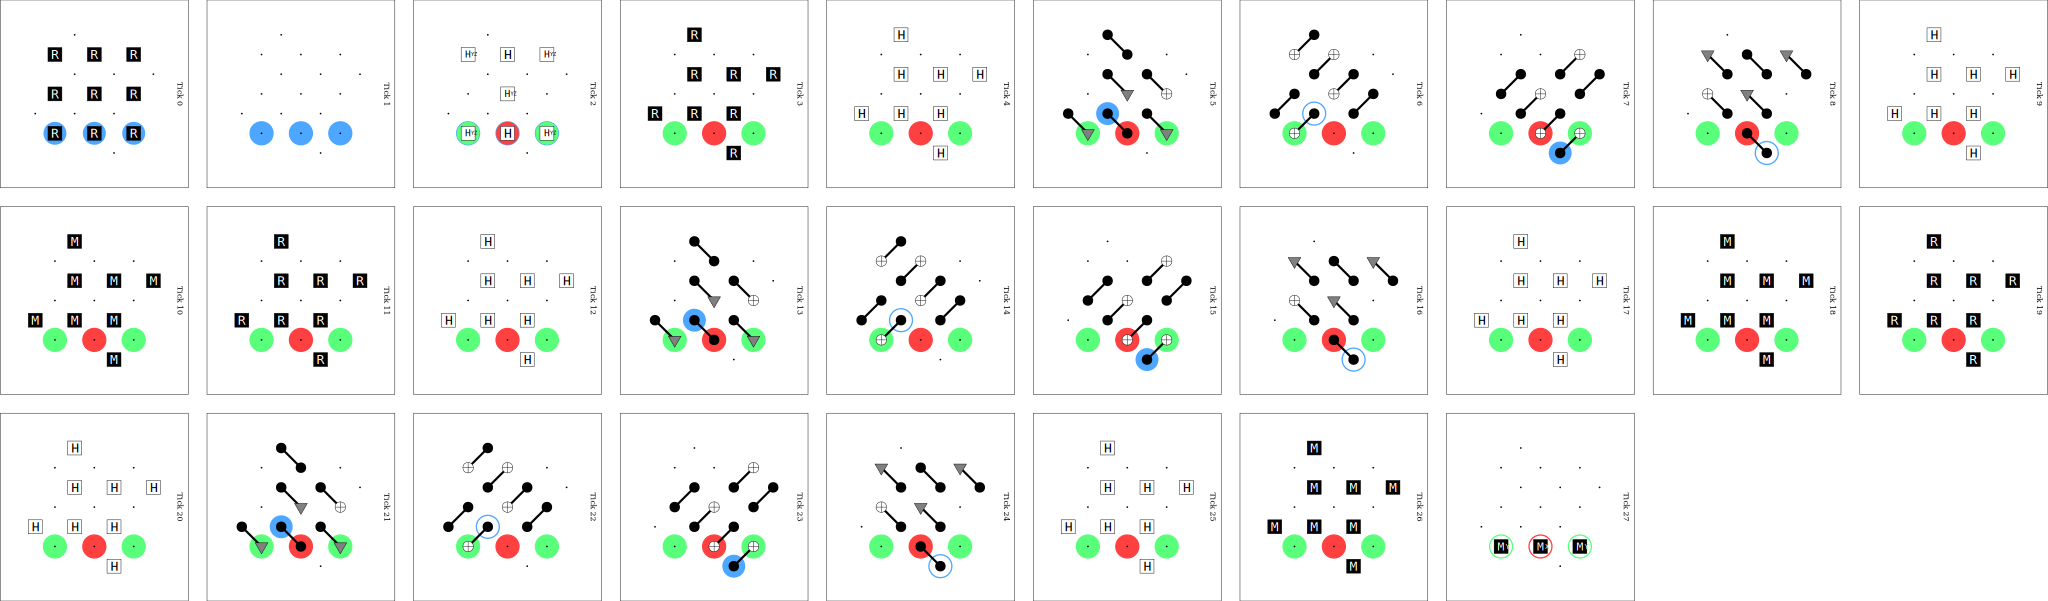

In [16]:
build_stim_circuit(code, deformation, rounds, basis='+Z').diagram("detslice-with-ops-svg", filter_coords=["L0"], rows=rounds)

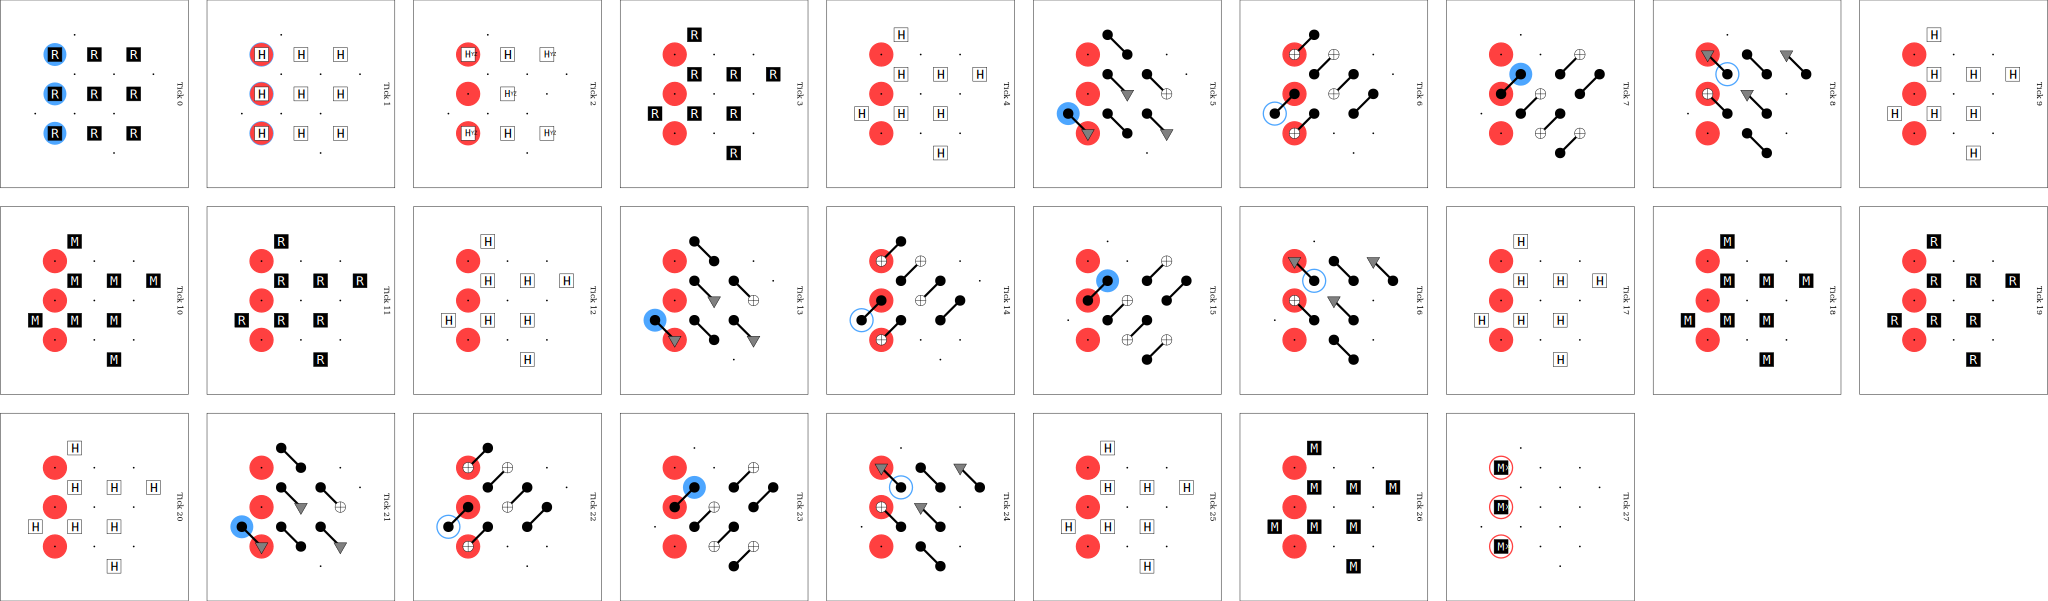

In [17]:
build_stim_circuit(code, deformation, rounds, basis='+X').diagram("detslice-with-ops-svg", filter_coords=["L0"], rows=rounds)